## importing Neccesary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor


# Loading the dataset

In [2]:

data=pd.read_csv('data.csv')

# Data set exploration

In [3]:
data

,Unnamed: 0,height,sex_no,shoe_size
0,0,160.0,2,40
1,1,171.0,2,39
2,2,174.0,2,39
3,3,176.0,2,40
4,4,195.0,1,46
...,...,...,...,...
157,59,162.0,1,40
158,60,175.0,2,39
159,61,162.0,1,40
160,62,156.0,2,38


In [4]:
data=data.drop('Unnamed: 0',axis=1)

In [5]:
data=data.rename(columns={'height':'height','sex_no':'gender','shoe_size':'size'})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  162 non-null    float64
 1   gender  162 non-null    int64  
 2   size    162 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.9 KB


In [7]:
data.gender.value_counts()

2    109
1     51
0      2
Name: gender, dtype: int64

# Removing inappropraite data points

In [8]:
rem=data[data['gender']==0]
rem

,height,gender,size
110,175.0,0,44
128,190.0,0,46


In [9]:
data=data.drop([110,128],axis=0)

In [10]:
data.gender.value_counts()

2    109
1     51
Name: gender, dtype: int64

In [11]:
df=data

In [12]:
df

,height,gender,size
0,160.0,2,40
1,171.0,2,39
2,174.0,2,39
3,176.0,2,40
4,195.0,1,46
...,...,...,...
157,162.0,1,40
158,175.0,2,39
159,162.0,1,40
160,156.0,2,38


In [13]:
df.gender.value_counts()
data=df

In [14]:
import plotly.express as ex

In [15]:
fig = ex.histogram(data, x="gender",  title="<b>Gender distribution</b>")
fig.update_layout(width=800, height=400, bargap=0.1)
fig.show()

In [16]:
fig = ex.histogram(data, x="height",  title="<b>Height distribution</b>")
fig.update_layout(width=800, height=400, bargap=0.1)
fig.show()

In [17]:
fig = ex.histogram(data, x="size",  title="<b>size distribution</b>")
fig.update_layout(width=800, height=400, bargap=0.1)
fig.show()

In [18]:
fig = ex.box(data, y="height",  title="<b>Hight distribution</b>")
fig.update_layout(width=800, height=400, bargap=0.1)
fig.show()

In [19]:

fig = ex.box(data, y="size",  title="<b>Hight distribution</b>")
fig.update_layout(width=800, height=400, bargap=0.1)
fig.show()

In [20]:
Q1 = data['height'].quantile(0.25)
Q3 = data['height'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['height'] >= lower_bound) & (data['height'] <= upper_bound)]
data


,height,gender,size
0,160.0,2,40
1,171.0,2,39
2,174.0,2,39
3,176.0,2,40
4,195.0,1,46
...,...,...,...
157,162.0,1,40
158,175.0,2,39
159,162.0,1,40
160,156.0,2,38


<AxesSubplot:>

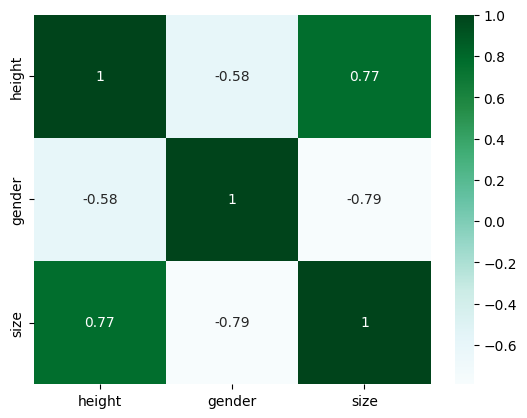

In [21]:
sns.heatmap(data.corr(),annot=True,cmap='BuGn')

# splitting of data into x and y datasets

In [22]:

x=data.drop('size', axis=1)
x

,height,gender
0,160.0,2
1,171.0,2
2,174.0,2
3,176.0,2
4,195.0,1
...,...,...
157,162.0,1
158,175.0,2
159,162.0,1
160,156.0,2


In [23]:
y=data['size']
y

0      40
1      39
2      39
3      40
4      46
       ..
157    40
158    39
159    40
160    38
161    39
Name: size, Length: 152, dtype: int64

# splitting the datasets into training and testing

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

# MODEL DEVELOPMENT

LINEAR REGRESSION

In [25]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_acc=r2_score(y_test,lr_pred)
lr_acc

0.7340668455302538

ELASTICNET MODEL

In [26]:
from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5) 

elastic_net_model.fit(x_train,y_train)
elastic_net_model_pred=elastic_net_model.predict(x_test)
elastic_net_model_acc=r2_score(y_test,elastic_net_model_pred)
elastic_net_model_acc


0.7253302581690996

RIDGE REGRESSION

In [27]:
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.1)  
ridge.fit(x_train,y_train)
ridge_pred=ridge.predict(x_test)
ridge_acc=r2_score(y_test,ridge_pred)
ridge_acc

0.7348355330532856

RANDOM FOREST

In [28]:
rf=RandomForestRegressor(120)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_acc=r2_score(y_test,rf_pred)
rf_acc

0.6840464740748327

In [29]:
ridge.score(x_test,y_test)

0.7348355330532856

In [30]:
data

,height,gender,size
0,160.0,2,40
1,171.0,2,39
2,174.0,2,39
3,176.0,2,40
4,195.0,1,46
...,...,...,...
157,162.0,1,40
158,175.0,2,39
159,162.0,1,40
160,156.0,2,38


In [31]:
ridge.predict([[152,2]]).round()

array([36.])

In [32]:
ridge.predict([[162,1]]).round()

array([41.])

In [33]:
ridge.predict([[174,2]]).round()

array([40.])

In [34]:
ridge.predict([[156,2]]).round()

array([37.])

In [35]:
ridge.predict([[170,1]]).round()

array([42.])

In [36]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(ridge,f)

In [37]:
with open('model.pkl','rb') as f:
    model=pickle.load(f)

In [38]:
model.predict([[170,1]]).round()

array([42.])

In [39]:
model.predict([[165,1]]).round()

array([42.])